In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

processing the video frames

In [3]:
mp_colister=mp.solutions.holistic     #for downloading a holistic methods
mp_drawing=mp.solutions.drawing_utils #for drawing a holistic on image frame

In [4]:
def mediapipe_detection(image,modal):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #converting image from bgr to rbg
    image.flags.writeable=False                 #make the image not writeable
    results=modal.process(image)             #place the landmarks on the video
    image.flags.writeable=True                  #make the image writeable
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR) #converting image from  rbg to bgr
    return image,results

In [5]:
def apply_drawing(image,result):
    mp_drawing.draw_landmarks(image,result.face_landmarks,mp_colister.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image,result.pose_landmarks,mp_colister.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,result.left_hand_landmarks,mp_colister.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,result.right_hand_landmarks,mp_colister.HAND_CONNECTIONS)


In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_colister.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_colister.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_colister.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_colister.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [8]:
#to open the video cam of the webcam(0)
cap=cv2.VideoCapture(0)
with mp_colister.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #read the frame from webcam
        ret,frame=cap.read()
        #finding the movements of holistics in a poser
        image,results=mediapipe_detection(frame,holistic)
        #show the frames to user in a window named "OpenCv"
        draw_styled_landmarks(image,results)
        cv2.imshow('OpenCV',image)
        #waiting for user to press any key 
        if cv2.waitKey(10)&0xff==ord('q'):
            break
    #closing the frame presentation        
    cap.release()
    #closing the recording of frames
    cv2.destroyAllWindows()  

In [9]:
apply_drawing(frame,results)

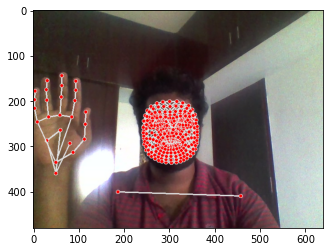

In [10]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [11]:
def get_keypoint(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [13]:
DATA_PATH=os.path.join('Cricket-data')
actions=np.array(['Out','Four','Six','Bye','One_short','Wide_ball','Dead_ball','No_ball','Cancel_ball','New_ball'])
no_sequences=30
sequences_length=30
tot_frames=30

In [ ]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [ ]:

#to open the video cam of the webcam(0)
cap=cv2.VideoCapture(0)
with mp_colister.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for no_sequence  in range(no_sequences):

            for no_frame in range(tot_frames):
                 # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if no_frame == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, no_sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(3000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, no_sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints =get_keypoint(results)
                npy_path = os.path.join(DATA_PATH, action, str(no_sequence), str(no_frame))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

               
    #closing the frame presentation        
    cap.release()
    #closing the recording of frames
    cv2.destroyAllWindows()

In [ ]:
       
cap.release()
    #closing the recording of frames
cv2.destroyAllWindows()

Data preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical 

In [ ]:
label_map={label:num for num,label in enumerate(actions)}

In [ ]:
label_map

{'hello': 0, 'thanks': 1, 'iLoveYou': 2}

In [ ]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(tot_frames):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [ ]:
x=np.array(sequences,dtype=object)
len(x[0][16])

1662

In [ ]:
y=to_categorical(labels).astype(int)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05)

Training the Data

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf

In [ ]:
log_dir=os.path.join('logs')
tb_callback=TensorBoard(log_dir=log_dir)

In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
x_train = np.asarray(x_train).astype(np.float32)
y_train=np.asarray(y_train).astype(np.float32)

In [ ]:
model.fit(x_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 11s 1s/step - loss: 3.7469 - categorical_accuracy: 0.3717
Epoch 2/2000
3/3 [==============================] - 0s 139ms/step - loss: 1.8152 - categorical_accuracy: 0.2584
Epoch 3/2000
3/3 [==============================] - 0s 157ms/step - loss: 1.3402 - categorical_accuracy: 0.2563
Epoch 4/2000
3/3 [==============================] - 1s 188ms/step - loss: 2.2582 - categorical_accuracy: 0.2623
Epoch 5/2000
3/3 [==============================] - 0s 160ms/step - loss: 1.2201 - categorical_accuracy: 0.3405
Epoch 6/2000
3/3 [==============================] - 0s 172ms/step - loss: 2.2624 - categorical_accuracy: 0.1996
Epoch 7/2000
3/3 [==============================] - 1s 184ms/step - loss: 1.3129 - categorical_accuracy: 0.2368
Epoch 8/2000
3/3 [==============================] - 1s 206ms/step - loss: 1.5647 - categorical_accuracy: 0.3875
Epoch 9/2000
3/3 [==============================] - 0s 156ms/step - loss: 1.2030 - categorical_accuracy: 0

In [ ]:
model.save('trained_weights')

INFO:tensorflow:Assets written to: trained_weights\assets


In [ ]:
x_test = np.asarray(x_test).astype(np.float32)

In [ ]:
y_test = np.asarray(y_test).astype(np.float32)


In [ ]:
yhat = model.predict(x_train)

In [ ]:
actions[np.argmax(yhat[0])]

'iLoveYou'

In [ ]:
actions[np.argmax(y_test[0])]

'iLoveYou'

In [ ]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
accuracy_score(ytrue, yhat)

1.0

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
cap_frames=[]
setences=[]
threshold=0.4
cap=cv2.VideoCapture(0)
with mp_colister.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #read the frame from webcam
        ret,frame=cap.read()
        #finding the movements of holistics in a poser
        image,results=mediapipe_detection(frame,holistic)
        #show the frames to user in a window named "OpenCv"
        draw_styled_landmarks(image,results)
        
        keypoints=get_keypoint(results)
        cap_frames.append(keypoints)
        cap_frames=cap_frames[-30:]

        if len(cap_frames)==30:
            res=model.predict(np.expand_dims(cap_frames,axis=0))[0]
            print(actions[np.argmax(res)])

            if res[np.argmax(res)]>threshold:
                if len(setences) > 0:
                    if actions[np.argmax(res)]!= setences[-1]:
                        setences.append(actions[np.argmax(res)])
                else:
                    setences.append(actions[np.argmax(res)])

            if len(setences)>5:
                setences=setences[-5:]  

            image = prob_viz(res, actions, image, colors)   
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(setences), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)        

    
        cv2.imshow('OpenCV',image)
        #waiting for user to press any key 
        if cv2.waitKey(10)&0xff==ord('q'):
            break
    #closing the frame presentation        
    cap.release()
    #closing the recording of frames
    cv2.destroyAllWindows()

hello
hello
hello
hello
iLoveYou
iLoveYou
iLoveYou
thanks
thanks
thanks
thanks
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
hello
hello
hello
hello
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
iLoveYou
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
iLoveYou
iLoveYou
iLoveYou
thanks
thank

In [ ]:
#closing the frame presentation        
cap.release()
#closing the recording of frames
cv2.destroyAllWindows()